In [214]:
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
import pandas as pd 

df=pd.read_csv('netflix_titles_nov_2019.csv')



In [215]:
df['duration']

0        1 Season
1          67 min
2         135 min
3         106 min
4       2 Seasons
          ...    
5832       84 min
5833       29 min
5834      104 min
5835     1 Season
5836       81 min
Name: duration, Length: 5837, dtype: object

In [216]:
df.isna().mean() * 100


show_id          0.000000
title            0.000000
director        32.568100
cast             9.525441
country          7.315402
date_added      10.998801
release_year     0.000000
rating           0.171321
duration         0.000000
listed_in        0.000000
description      0.000000
type             0.000000
dtype: float64

In [217]:
df.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show


In [218]:
nv_dt = df[['rating', 'duration', 'listed_in', 'type','title']]


In [219]:
nv_dt['rating'].describe()

count      5827
unique       14
top       TV-MA
freq       1937
Name: rating, dtype: object

In [220]:
nv_dt.describe()

,rating,duration,listed_in,type,title
count,5827,5837,5837,5837,5837
unique,14,194,449,2,5780
top,TV-MA,1 Season,Documentaries,Movie,Love
freq,1937,1259,297,3939,3


In [221]:
nv_dt['rating'].unique()

array(['TV-14', 'TV-G', 'TV-Y', 'TV-MA', 'TV-PG', 'R', 'TV-Y7', 'PG', 'G',
       'PG-13', 'TV-Y7-FV', 'NR', 'UR', 'NC-17', nan], dtype=object)

In [222]:
rating_unique_ordered = {
    'TV-Y': 0,       # Tout public
    'TV-G': 1,       # Tout public
    'G': 2,          # Tout public

    'TV-Y7': 3,      # Enfants 7+
    'TV-Y7-FV': 4,   # Enfants 7+ avec violence fantastique

    'PG': 5,         # Parental Guidance
    'TV-PG': 6,      # Parental Guidance

    'PG-13': 7,      # Interdit < 13

    'TV-14': 8,      # Interdit < 14

    'R': 9,          # Interdit < 17
    'TV-MA': 10,     # Contenu adulte 17+

    'NC-17': 11,     # Strictement interdit < 17

    'NR': 12,        # Not Rated
    'UR': 13,        # Unrated
}



In [223]:
nv_dt['rating'] = nv_dt['rating'].map(rating_unique_ordered)


C:\Users\12\AppData\Local\Temp\ipykernel_3800\896960127.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [224]:
nv_dt['rating'].describe()

count    5827.000000
mean        7.945426
std         2.582409
min         0.000000
25%         7.000000
50%         8.000000
75%        10.000000
max        13.000000
Name: rating, dtype: float64

In [225]:
nv_dt['rating'] = nv_dt['rating'].fillna(8)



C:\Users\12\AppData\Local\Temp\ipykernel_3800\784137927.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [226]:
nv_dt['rating'].unique()

array([ 8.,  1.,  0., 10.,  6.,  9.,  3.,  5.,  2.,  7.,  4., 12., 13.,
       11.])

In [227]:
nv_dt['title'].describe()

count     5837
unique    5780
top       Love
freq         3
Name: title, dtype: object

In [228]:
nv_dt['type'].describe()

count      5837
unique        2
top       Movie
freq       3939
Name: type, dtype: object

In [229]:
df_films = nv_dt[nv_dt['type'] == 'Movie']


In [230]:
df_films['duration'] = df_films['duration'].str.extract(r'(\d+)').astype(float)

C:\Users\12\AppData\Local\Temp\ipykernel_3800\1702398230.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [231]:
df_films['duration'].unique()

array([ 67., 135., 106., 107.,  81., 118., 110., 104.,  93.,  94., 124.,
       137., 134.,  69., 209.,  86.,  24.,  46., 117.,  87.,  92., 114.,
       121., 109.,  96.,  97.,  56., 119., 138., 111.,  88.,  73., 116.,
        85., 102., 101.,  28., 103., 131., 166., 105.,  82.,  84., 112.,
        89., 136., 129., 158.,  78., 100.,  74.,  60., 143.,  98.,  54.,
        59.,  95.,  61., 123.,  44.,  68.,  99.,  91.,  40.,  90., 108.,
       200., 133., 115.,  55., 153., 185., 127., 120., 139., 122.,  36.,
       141.,  65., 126.,  63.,  14.,  20.,  52.,  83.,  66., 140.,  22.,
        62., 151., 154.,  70.,  76.,  77.,  45., 147.,  58.,  64., 125.,
        79., 163.,  42.,  38., 146., 130., 152., 182., 171.,  80., 157.,
       142.,  10., 128., 149., 113.,  47., 167.,  72., 145., 164., 177.,
        57., 161.,  32.,  53.,  26.,  48., 176.,  15.,  71.,  12.,   3.,
        30., 159., 150., 165., 148.,  49., 168., 170., 132.,  75., 162.,
        51.,  50., 144.,  34.,  29., 312.,  27.,  3

In [232]:
df_films['listed_in'].unique()

array(['Documentaries, International Movies',
       'Comedies, Dramas, International Movies',
       'Dramas, Independent Movies, International Movies',
       'Comedies, International Movies, Thrillers',
       'Dramas, International Movies', 'Comedies, International Movies',
       'Comedies, Independent Movies, International Movies',
       'Action & Adventure, Comedies, International Movies',
       'Dramas, International Movies, Thrillers',
       'Children & Family Movies, Dramas', 'Dramas, Thrillers',
       'Action & Adventure, Dramas',
       'Comedies, International Movies, Romantic Movies',
       'Children & Family Movies, Comedies', 'Dramas, Independent Movies',
       'Dramas', 'Stand-Up Comedy', 'Children & Family Movies', 'Movies',
       'Action & Adventure, Dramas, International Movies', 'Thrillers',
       'Action & Adventure, Children & Family Movies, Comedies',
       'Children & Family Movies, Classic Movies', 'Action & Adventure',
       'Action & Adventure, Sci

In [233]:
df_films = df_films.drop(columns=['type'])

In [234]:
df_films.head()

,rating,duration,listed_in,title
1,1.0,67.0,"Documentaries, International Movies",Guatemala: Heart of the Mayan World
2,8.0,135.0,"Comedies, Dramas, International Movies",The Zoya Factor
3,8.0,106.0,"Dramas, Independent Movies, International Movies",Atlantics
5,8.0,107.0,"Comedies, International Movies, Thrillers",Crazy people
6,10.0,81.0,"Dramas, Independent Movies, International Movies",I Lost My Body


In [235]:
df_films.isna().mean() * 100

rating       0.0
duration     0.0
listed_in    0.0
title        0.0
dtype: float64

In [236]:

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_films['title'])   


In [237]:
# 1️⃣ Construire le dictionnaire des genres uniques
all_genres = set()
for genres in df_films['listed_in']:
    # Séparer par ',' puis par '&', tout en conservant les espaces dans les genres
    parts = []
    for g in genres.split(','):
        parts.extend([x.strip() for x in g.split('&')])
    all_genres.update(parts)

# Assigner un numéro unique à chaque genre
genre_dict = {genre: idx for idx, genre in enumerate(sorted(all_genres), start=1)}

# 2️⃣ Convertir listed_in en liste de numéros
def genres_to_indices(genres):
    indices = set()  # éviter les doublons
    for g in genres.split(','):
        subgenres = [x.strip() for x in g.split('&')]
        for sg in subgenres:
            indices.add(genre_dict[sg])
            
    return sorted(list(indices))

# 3️⃣ Appliquer la fonction au DataFrame
df_films['genres_indices'] = df_films['listed_in'].apply(genres_to_indices)


In [238]:
print(genre_dict)

{'Action': 1, 'Adventure': 2, 'Anime Features': 3, 'Children': 4, 'Classic Movies': 5, 'Comedies': 6, 'Cult Movies': 7, 'Documentaries': 8, 'Dramas': 9, 'Faith': 10, 'Family Movies': 11, 'Fantasy': 12, 'Horror Movies': 13, 'Independent Movies': 14, 'International Movies': 15, 'LGBTQ Movies': 16, 'Movies': 17, 'Music': 18, 'Musicals': 19, 'Romantic Movies': 20, 'Sci-Fi': 21, 'Spirituality': 22, 'Sports Movies': 23, 'Stand-Up Comedy': 24, 'Thrillers': 25}


In [239]:
df_films.head()

,rating,duration,listed_in,title,genres_indices
1,1.0,67.0,"Documentaries, International Movies",Guatemala: Heart of the Mayan World,"[8, 15]"
2,8.0,135.0,"Comedies, Dramas, International Movies",The Zoya Factor,"[6, 9, 15]"
3,8.0,106.0,"Dramas, Independent Movies, International Movies",Atlantics,"[9, 14, 15]"
5,8.0,107.0,"Comedies, International Movies, Thrillers",Crazy people,"[6, 15, 25]"
6,10.0,81.0,"Dramas, Independent Movies, International Movies",I Lost My Body,"[9, 14, 15]"


In [240]:
df_films['listed_in']=df_films['genres_indices']


In [241]:
df_films=df_films.drop(columns=['genres_indices'])

In [243]:
df_films.head()

,rating,duration,listed_in,title
1,1.0,67.0,"[8, 15]",Guatemala: Heart of the Mayan World
2,8.0,135.0,"[6, 9, 15]",The Zoya Factor
3,8.0,106.0,"[9, 14, 15]",Atlantics
5,8.0,107.0,"[6, 15, 25]",Crazy people
6,10.0,81.0,"[9, 14, 15]",I Lost My Body


In [244]:
df_films=df_films.drop(columns=['title'])

In [245]:
# Créer une colonne pour chaque genre
for genre, idx in genre_dict.items():
    # Si le film contient ce genre, mettre 1, sinon 0
    df_films[genre] = df_films['listed_in'].apply(lambda x: 1 if idx in x else 0)


In [246]:
df_films.head()

,rating,duration,listed_in,Action,Adventure,Anime Features,Children,Classic Movies,Comedies,Cult Movies,...,LGBTQ Movies,Movies,Music,Musicals,Romantic Movies,Sci-Fi,Spirituality,Sports Movies,Stand-Up Comedy,Thrillers
1,1.0,67.0,"[8, 15]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8.0,135.0,"[6, 9, 15]",0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,8.0,106.0,"[9, 14, 15]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,8.0,107.0,"[6, 15, 25]",0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
6,10.0,81.0,"[9, 14, 15]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [247]:
df_films=df_films.drop(columns=['listed_in'])

In [248]:
df_films.head()

,rating,duration,Action,Adventure,Anime Features,Children,Classic Movies,Comedies,Cult Movies,Documentaries,...,LGBTQ Movies,Movies,Music,Musicals,Romantic Movies,Sci-Fi,Spirituality,Sports Movies,Stand-Up Comedy,Thrillers
1,1.0,67.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,8.0,135.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8.0,106.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,8.0,107.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
6,10.0,81.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [249]:
df_films=df_films.drop(columns=['Anime Features','Classic Movies','Cult Movies','LGBTQ Movies','Movies','Music','Musicals'],axis=1)

In [250]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Supposons que df_film_final contient toutes tes colonnes numériques
# (titres vectorisés + autres features)

scaler = StandardScaler()

# Normalisation
df_scaled = pd.DataFrame(
    scaler.fit_transform(df_films), 
    columns=df_films.columns, 
    index=df_films.index
)

print("Shape après normalisation :", df_scaled.shape)
print(df_scaled.head())


Shape après normalisation : (3939, 20)
     rating  duration    Action  Adventure  Children  Comedies  Documentaries  \
1 -3.070464 -1.119558 -0.395157  -0.395157 -0.307361 -0.580184       2.233007   
2 -0.091194  1.333936 -0.395157  -0.395157 -0.307361  1.723591      -0.447827   
3 -0.091194  0.287593 -0.395157  -0.395157 -0.307361 -0.580184      -0.447827   
5 -0.091194  0.323674 -0.395157  -0.395157 -0.307361  1.723591      -0.447827   
6  0.760025 -0.614427 -0.395157  -0.395157 -0.307361 -0.580184      -0.447827   

     Dramas     Faith  Family Movies   Fantasy  Horror Movies  \
1 -0.779166 -0.108702      -0.307361 -0.209094      -0.248445   
2  1.283424 -0.108702      -0.307361 -0.209094      -0.248445   
3  1.283424 -0.108702      -0.307361 -0.209094      -0.248445   
5 -0.779166 -0.108702      -0.307361 -0.209094      -0.248445   
6  1.283424 -0.108702      -0.307361 -0.209094      -0.248445   

   Independent Movies  International Movies  Romantic Movies    Sci-Fi  \
1        

Calcul de l'inertie en cours...
Calcul terminé.


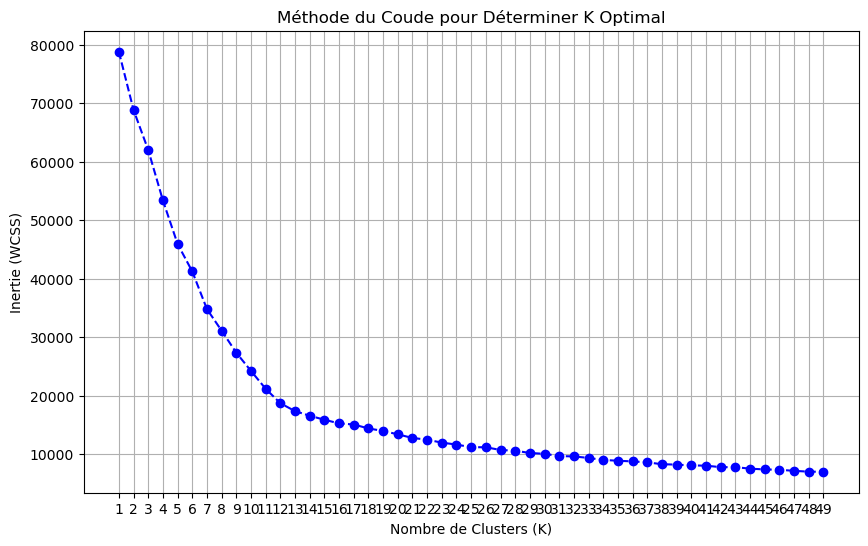

In [251]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# --- 1. Simulation des données (À remplacer par votre variable data_normalisee) ---
# Supposons que 'data_normalisee' est votre DataFrame final, prêt pour le clustering.
# REMPLACEZ CETTE SIMULATION PAR VOTRE VRAI DATAFRAME NORMALISÉ
try:
    # Utilisez votre propre DataFrame ici
    df = df_scaled
except NameError:
    # Simulation pour l'exemple (27 colonnes comme mentionné, avec des valeurs standardisées/binaires)
    print("Utilisation de données simulées. Remplacez par votre 'data_normalisee'.")
    import numpy as np
    np.random.seed(42)
    n_samples = 500
    n_features = 21
    df = pd.DataFrame(np.random.rand(n_samples, n_features), columns=[f'Feature_{i}' for i in range(n_features)])
    # S'assurer que les premières colonnes (rating, duration) ont des valeurs standardisées
    df.iloc[:, 0] = np.random.randn(n_samples) # rating
    df.iloc[:, 1] = np.random.randn(n_samples) # duration
    # S'assurer que les colonnes de genre sont binaires (pour l'exemple)
    df.iloc[:, 2:] = np.random.randint(0, 2, size=(n_samples, n_features - 2))

# Convertir le DataFrame en tableau numpy pour K-means
X = df.values

# --- 2. Calcul de l'Inertie pour K allant de 1 à 15 ---
# Liste pour stocker les valeurs d'inertie (WCSS)
wcss = [] 
# Définir la plage de K à tester (de 1 à 15)
k_range = range(1, 50) 

print("Calcul de l'inertie en cours...")

for k in k_range:
    # Créer le modèle K-means avec k clusters
    # Le paramètre 'n_init=10' garantit que l'algorithme est exécuté 10 fois pour trouver un bon optimum
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    # Entraîner le modèle
    kmeans.fit(X)
    # Ajouter l'inertie du modèle (WCSS) à la liste
    wcss.append(kmeans.inertia_)

print("Calcul terminé.")

# --- 3. Visualisation de la Méthode du Coude ---
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='--', color='blue')
plt.title('Méthode du Coude pour Déterminer K Optimal')
plt.xlabel('Nombre de Clusters (K)')
plt.ylabel('Inertie (WCSS)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [252]:
df.shape

(3939, 20)

In [ ]:
# (Assurez-vous que X contient vos données normalisées de 27 colonnes)
from sklearn.cluster import KMeans

K_optimal = 5  # Basé sur l'analyse de la courbe
kmeans_final = KMeans(n_clusters=K_optimal, init='k-means++', n_init=10, random_state=42)
kmeans_final.fit(X)


df_films['Cluster_Label'] = kmeans_final.labels_

In [254]:
df_films.head()

,rating,duration,Action,Adventure,Children,Comedies,Documentaries,Dramas,Faith,Family Movies,...,Horror Movies,Independent Movies,International Movies,Romantic Movies,Sci-Fi,Spirituality,Sports Movies,Stand-Up Comedy,Thrillers,Cluster_Label
1,1.0,67.0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,3
2,8.0,135.0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,8.0,106.0,0,0,0,0,0,1,0,0,...,0,1,1,0,0,0,0,0,0,1
5,8.0,107.0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
6,10.0,81.0,0,0,0,0,0,1,0,0,...,0,1,1,0,0,0,0,0,0,1


In [255]:
# Calculer la moyenne de toutes les caractéristiques par cluster
cluster_profiles = df_films.groupby('Cluster_Label').mean()
print(cluster_profiles)

                 rating    duration    Action  Adventure  Children  Comedies  \
Cluster_Label                                                                  
0              8.067073  106.170732  0.524390   0.524390  0.097561  0.103659   
1              8.807851  109.113223  0.178926   0.178926  0.000000  0.338017   
2              6.586957  105.086957  0.043478   0.043478  0.086957  0.152174   
3              8.283114   75.097068  0.002022   0.002022  0.000000  0.013145   
4              3.821875   79.893750  0.028125   0.028125  1.000000  0.428125   

               Documentaries    Dramas  Faith  Family Movies   Fantasy  \
Cluster_Label                                                            
0                   0.000000  0.207317    0.0       0.097561  1.000000   
1                   0.000000  0.569008    0.0       0.000000  0.000000   
2                   0.239130  0.608696    1.0       0.086957  0.021739   
3                   0.646107  0.007078    0.0       0.000000  0.00000

In [256]:
df_films.head()

,rating,duration,Action,Adventure,Children,Comedies,Documentaries,Dramas,Faith,Family Movies,...,Horror Movies,Independent Movies,International Movies,Romantic Movies,Sci-Fi,Spirituality,Sports Movies,Stand-Up Comedy,Thrillers,Cluster_Label
1,1.0,67.0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,3
2,8.0,135.0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,8.0,106.0,0,0,0,0,0,1,0,0,...,0,1,1,0,0,0,0,0,0,1
5,8.0,107.0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
6,10.0,81.0,0,0,0,0,0,1,0,0,...,0,1,1,0,0,0,0,0,0,1


Réduction de la dimensionnalité à 2D avec T-SNE (peut prendre quelques secondes)...


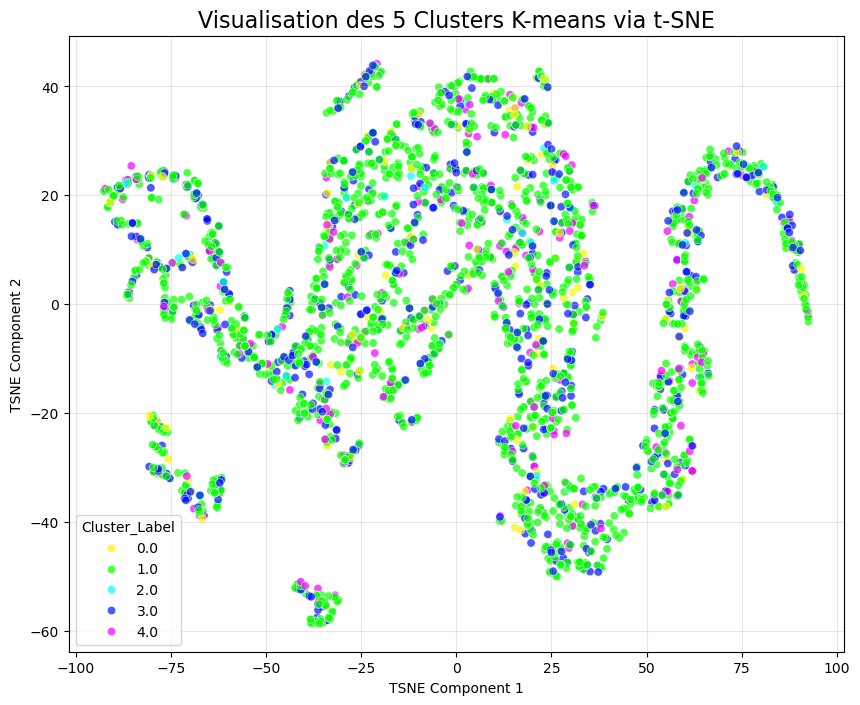

In [257]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Séparation des features (X) et des labels (y)
X = df_films.drop(columns=['Cluster_Label']).values
y = df_films['Cluster_Label']
# ==============================================================================


# 1. Réduction de Dimensionnalité avec T-SNE
print("Réduction de la dimensionnalité à 2D avec T-SNE (peut prendre quelques secondes)...")
# T-SNE est non-linéaire et excellent pour la visualisation de clusters.
tsne = TSNE(
    n_components=2,          # Projeté sur 2 dimensions
    perplexity=30,           # Paramètre typique pour les données de cette taille
    random_state=42,
    n_jobs=-1                # Utilisation de tous les cœurs disponibles pour accélérer
)
X_tsne = tsne.fit_transform(X)

# 2. Préparation du DataFrame pour la visualisation
df_tsne = pd.DataFrame(data = X_tsne, columns = ['TSNE Component 1', 'TSNE Component 2'])
df_tsne['Cluster_Label'] = y # Ajout des labels pour la coloration

# 3. Visualisation du Clustering
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x="TSNE Component 1",
    y="TSNE Component 2",
    hue="Cluster_Label",       # Utilise le label pour la couleur
    palette=sns.color_palette("hsv", n_colors=5), # Palette de couleurs pour 5 clusters
    data=df_tsne,
    legend="full",
    alpha=0.7
)
plt.title('Visualisation des 5 Clusters K-means via t-SNE', fontsize=16)
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.grid(True, alpha=0.3)
plt.savefig('tsne_cluster_visualization.png')
plt.show()

In [258]:
cluster_counts = df_films['Cluster_Label'].value_counts().sort_index()

In [259]:
print(cluster_counts)

Cluster_Label
0     164
1    2420
2      46
3     989
4     320
Name: count, dtype: int64


In [260]:
cluster_profiles = df_films.groupby('Cluster_Label').mean()
print(cluster_profiles)

                 rating    duration    Action  Adventure  Children  Comedies  \
Cluster_Label                                                                  
0              8.067073  106.170732  0.524390   0.524390  0.097561  0.103659   
1              8.807851  109.113223  0.178926   0.178926  0.000000  0.338017   
2              6.586957  105.086957  0.043478   0.043478  0.086957  0.152174   
3              8.283114   75.097068  0.002022   0.002022  0.000000  0.013145   
4              3.821875   79.893750  0.028125   0.028125  1.000000  0.428125   

               Documentaries    Dramas  Faith  Family Movies   Fantasy  \
Cluster_Label                                                            
0                   0.000000  0.207317    0.0       0.097561  1.000000   
1                   0.000000  0.569008    0.0       0.000000  0.000000   
2                   0.239130  0.608696    1.0       0.086957  0.021739   
3                   0.646107  0.007078    0.0       0.000000  0.00000

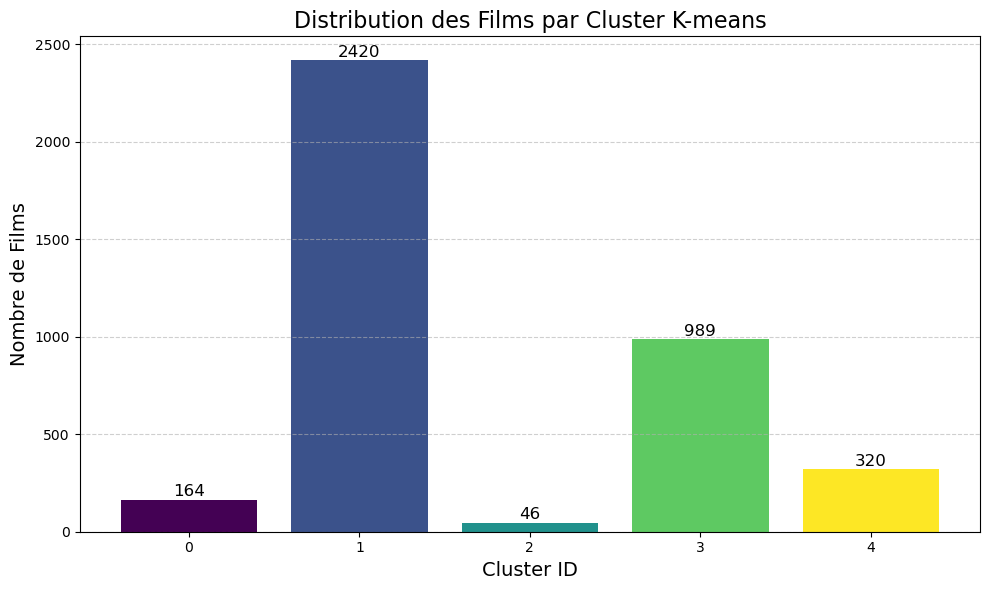

In [261]:
cluster_counts = df_films['Cluster_Label'].value_counts().sort_index()

# 2. Préparation des données pour Matplotlib
cluster_ids = cluster_counts.index.astype(str) # Les IDs de cluster pour l'axe X
counts = cluster_counts.values                 # Le nombre de films pour l'axe Y

# 3. Visualisation avec Matplotlib
plt.figure(figsize=(10, 6))

# Utilisation de plt.bar()
bars = plt.bar(
    cluster_ids,
    counts,
    color=plt.cm.viridis(np.linspace(0, 1, len(cluster_ids))) # Utilisation d'une palette de couleurs Matplotlib
)

plt.title('Distribution des Films par Cluster K-means', fontsize=16)
plt.xlabel('Cluster ID', fontsize=14)
plt.ylabel('Nombre de Films', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Afficher la fréquence au-dessus de chaque barre
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, int(yval), ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

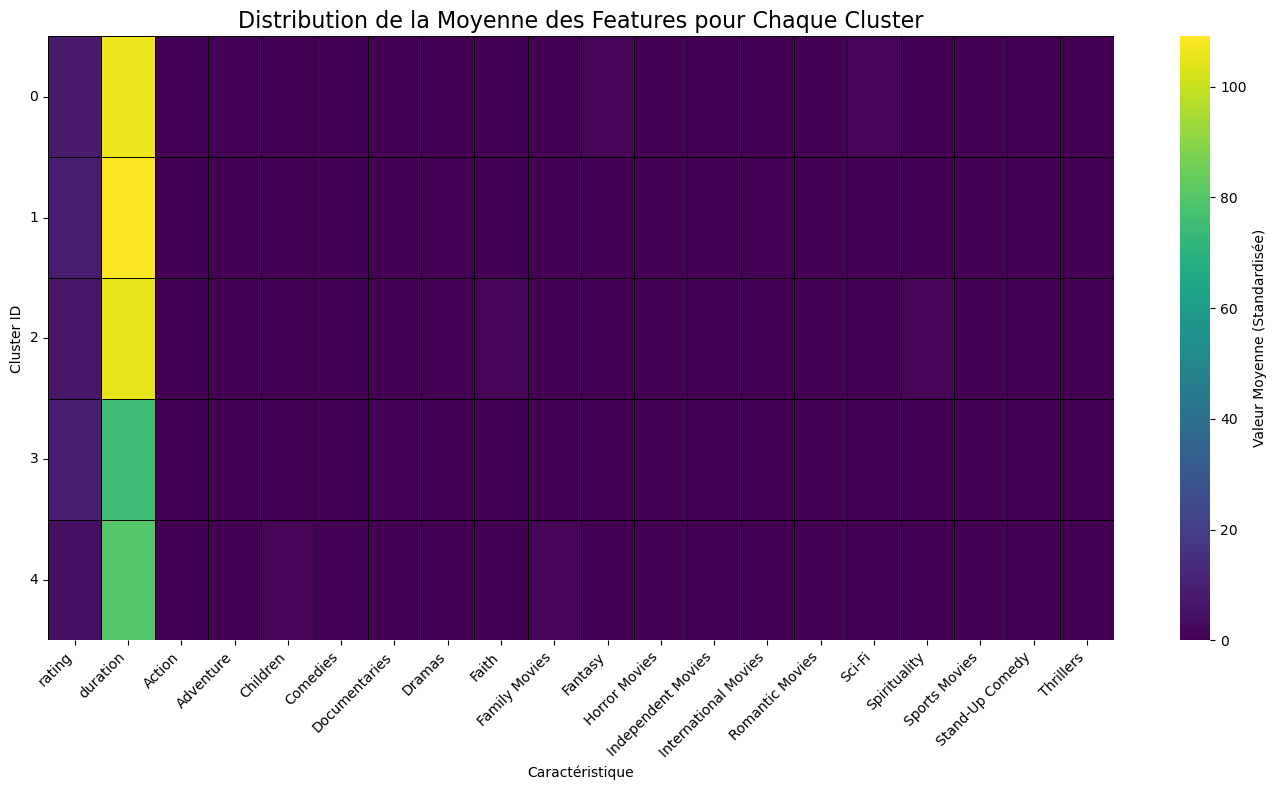

In [262]:
cluster_profiles_scaled = df_films.groupby('Cluster_Label').mean()
cluster_profiles_scaled = cluster_profiles_scaled.drop(columns=['Cluster_Label'], errors='ignore')

# 2. Visualisation des Centroïdes (Heatmap)
plt.figure(figsize=(14, 8))
sns.heatmap(
    cluster_profiles_scaled,
    annot=False,
    cmap='viridis',     
    linewidths=.5,
    linecolor='black',
    cbar_kws={'label': 'Valeur Moyenne (Standardisée)'}
)
plt.title('Distribution de la Moyenne des Features pour Chaque Cluster', fontsize=16)
plt.ylabel('Cluster ID')
plt.xlabel('Caractéristique')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [263]:
df_films.head()

,rating,duration,Action,Adventure,Children,Comedies,Documentaries,Dramas,Faith,Family Movies,...,Horror Movies,Independent Movies,International Movies,Romantic Movies,Sci-Fi,Spirituality,Sports Movies,Stand-Up Comedy,Thrillers,Cluster_Label
1,1.0,67.0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,3
2,8.0,135.0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,8.0,106.0,0,0,0,0,0,1,0,0,...,0,1,1,0,0,0,0,0,0,1
5,8.0,107.0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
6,10.0,81.0,0,0,0,0,0,1,0,0,...,0,1,1,0,0,0,0,0,0,1


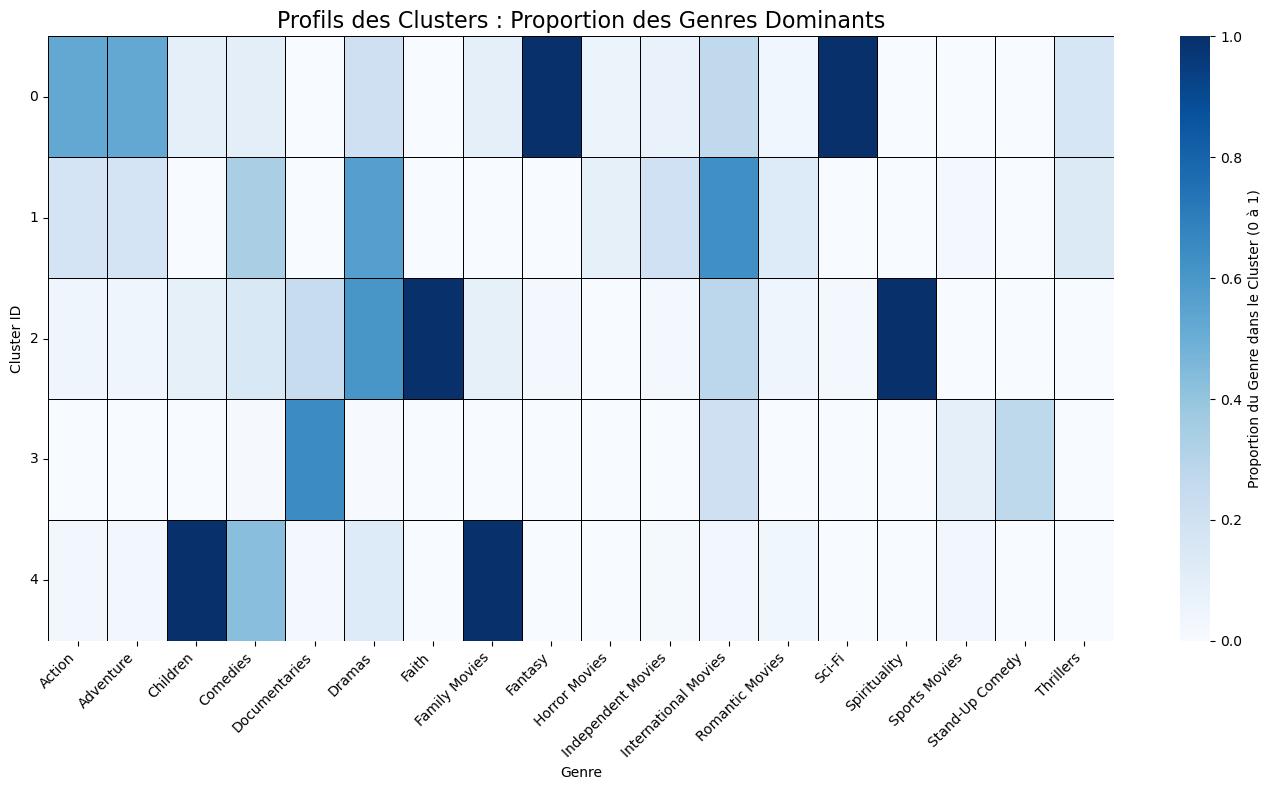

In [264]:
COLUMNS_TO_EXCLUDE = ['rating', 'duration', 'Cluster_Label'] 

# Supposons que df_films est votre DataFrame final
# cluster_profiles = df_films.groupby('Cluster_Label').mean()

cluster_profiles = df_films.groupby('Cluster_Label').mean()


# 2. Sélection UNIQUE des colonnes de genres (les features binaires)
# On prend toutes les colonnes SAUF celles qui sont dans la liste d'exclusion
genre_columns = [
    col for col in cluster_profiles.columns 
    if col not in COLUMNS_TO_EXCLUDE
]
genre_profiles = cluster_profiles[genre_columns]


# 3. Visualisation de la Heatmap des Genres SEULS
plt.figure(figsize=(14, 8)) # Taille ajustée pour 25 colonnes de genre

sns.heatmap(
    genre_profiles,
    annot=False,          # Mettre False car il y a beaucoup de colonnes
    cmap='Blues',         # Palette optimisée pour les valeurs entre 0 et 1
    fmt=".2f",
    linewidths=.5,
    linecolor='black',
    cbar_kws={'label': 'Proportion du Genre dans le Cluster (0 à 1)'}
)
plt.title('Profils des Clusters : Proportion des Genres Dominants', fontsize=16)
plt.ylabel('Cluster ID')
plt.xlabel('Genre')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [265]:
cluster_profiles.head()

,rating,duration,Action,Adventure,Children,Comedies,Documentaries,Dramas,Faith,Family Movies,Fantasy,Horror Movies,Independent Movies,International Movies,Romantic Movies,Sci-Fi,Spirituality,Sports Movies,Stand-Up Comedy,Thrillers
Cluster_Label,,,,,,,,,,,,,,,,,,,,
0,8.067073,106.170732,0.524390,0.524390,0.097561,0.103659,0.000000,0.207317,0.0,0.097561,1.000000,0.060976,0.073171,0.268293,0.036585,1.000000,0.0,0.000000,0.000000,0.164634
1,8.807851,109.113223,0.178926,0.178926,0.000000,0.338017,0.000000,0.569008,0.0,0.000000,0.000000,0.089256,0.205785,0.629752,0.130992,0.000000,0.0,0.020248,0.000000,0.134711
2,6.586957,105.086957,0.043478,0.043478,0.086957,0.152174,0.239130,0.608696,1.0,0.086957,0.021739,0.000000,0.021739,0.282609,0.043478,0.021739,1.0,0.000000,0.000000,0.000000
3,8.283114,75.097068,0.002022,0.002022,0.000000,0.013145,0.646107,0.007078,0.0,0.000000,0.000000,0.003033,0.000000,0.208291,0.000000,0.000000,0.0,0.091001,0.276036,0.000000
4,3.821875,79.893750,0.028125,0.028125,1.000000,0.428125,0.025000,0.131250,0.0,1.000000,0.000000,0.000000,0.015625,0.031250,0.040625,0.000000,0.0,0.031250,0.000000,0.000000


In [267]:
dict = {
    0 :'les films de Limaginaire',
    1 :'Les films populaires a un public reserve',
    2 :'les films spirituel',
    3 :'documentaires',
    4 :'les films de tout la famille'
}

In [268]:
df_films['Cluster_Label']=df_films['Cluster_Label'].map(dict)

In [269]:
df_films.head()

,rating,duration,Action,Adventure,Children,Comedies,Documentaries,Dramas,Faith,Family Movies,...,Horror Movies,Independent Movies,International Movies,Romantic Movies,Sci-Fi,Spirituality,Sports Movies,Stand-Up Comedy,Thrillers,Cluster_Label
1,1.0,67.0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,documentaires
2,8.0,135.0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,Les films populaires a un public reserve
3,8.0,106.0,0,0,0,0,0,1,0,0,...,0,1,1,0,0,0,0,0,0,Les films populaires a un public reserve
5,8.0,107.0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,Les films populaires a un public reserve
6,10.0,81.0,0,0,0,0,0,1,0,0,...,0,1,1,0,0,0,0,0,0,Les films populaires a un public reserve
